In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import re

worktime = 4 #[sek]


In [54]:
def getTestIdFromFilename(filename):
    return  int(re.findall(r'\d+', filename)[0])


In [55]:
#  read test descriptions

df_tests = pd.read_csv("/home/julle/projects/SearchWing/Tests/20201119_WifiTestSetup/wifibroadcast-test/testids.csv")
df_tests['testid'] = pd.to_numeric(df_tests['testid'])

for i, row in df_tests.iterrows():
    df_tests.at[i,'testdescr'] = "mcs"+ str(row['mcs'])+ " " + "fec_r"+str(row['FEC_r'])+ " " +str(row['bandwidth'])



In [56]:
#  read csvs

csvs_ByTestId = {}
path="/home/julle/projects/SearchWing/Tests/20201119_WifiTestSetup/wfb-test-results/InHousePhil20201120"
csvs = glob(os.path.join(path,"*.csv"))
maxValuesAll = []
for oneCsv in csvs:
    df_debug = pd.read_csv(oneCsv)     
    df_debug = df_debug.drop([0]) #delete first line due to error
    df_debug.drop_duplicates(subset=None, keep='first', inplace=True)
    df_debug['current_signal_dbm'] = np.mean(df_debug['current_signal_dbm'])


    filename = os.path.basename(oneCsv)
    testId = getTestIdFromFilename(filename)
    
    df_maxValues = pd.DataFrame(df_debug.max()).transpose()
    df_maxValues = df_maxValues.drop('stamp', 1)
    df_maxValues['testid'] = testId

    maxValuesAll.append(df_maxValues)

df_maxValuesAll = pd.concat(maxValuesAll)

df_tests = pd.merge(df_tests, df_maxValuesAll,  how='left', on='testid')

In [57]:
# read data files

nettoDataFiles = glob(os.path.join(path,"*.data"))
testIds = []
sizesBits = []
for oneNettoDataFile in nettoDataFiles:
    filename = os.path.basename(oneNettoDataFile)
    testIds.append(getTestIdFromFilename(filename))
    sizesBits.append((os.path.getsize(oneNettoDataFile)*8)/worktime) # convert to Bit/s
df_nettoDataSize = pd.DataFrame(data={'testid':testIds, 'nettoDataSize' : sizesBits})

df_tests = pd.merge(df_tests, df_nettoDataSize,  how='left', on='testid')


In [58]:
df_tests

,testid,FEC_d,FEC_r,mcs,Txpower,stbc,ldpc,bandwidth,testdescr,wifi_adapter_cnt,received_block_cnt,damaged_block_cnt,fecs_used_cnt,tx_restart_cnt,adapterIdx,current_signal_dbm,received_packet_cnt,wrong_crc_cnt,lost_packets_cnt,nettoDataSize
0,0,8,2,0,30,1,1,HT20,mcs0 fec_r2 HT20,1,137,0,2,0,0,-19.7174,1374,0,1,3169632.0
1,1,8,4,0,30,1,1,HT20,mcs0 fec_r4 HT20,1,126,0,6,0,0,-19.587,1504,0,8,2915136.0
2,2,8,6,0,30,1,1,HT20,mcs0 fec_r6 HT20,1,111,0,1,0,0,-19.5319,1556,0,1,2568096.0
3,3,8,2,1,30,1,1,HT20,mcs1 fec_r2 HT20,1,281,0,3,0,0,-19.2,2811,0,2,6501216.0
4,4,8,4,1,30,1,1,HT20,mcs1 fec_r4 HT20,1,220,0,4,0,0,-19.4783,2646,0,5,5089920.0
5,5,8,6,1,30,1,1,HT20,mcs1 fec_r6 HT20,1,179,0,3,0,0,-18.8696,2509,0,2,4141344.0
6,6,8,2,2,30,1,1,HT20,mcs2 fec_r2 HT20,1,324,0,7,0,0,-19.3696,3234,0,8,7496064.0
7,7,8,4,2,30,1,1,HT20,mcs2 fec_r4 HT20,1,297,2,7,0,0,-19.4884,3538,0,257,6830904.0
8,8,8,6,2,30,1,1,HT20,mcs2 fec_r6 HT20,1,307,0,7,0,0,-19.4222,4289,0,12,7102752.0
9,9,8,2,4,30,1,1,HT20,mcs4 fec_r2 HT20,1,669,0,8,0,0,-19.8667,6680,0,17,15477984.0


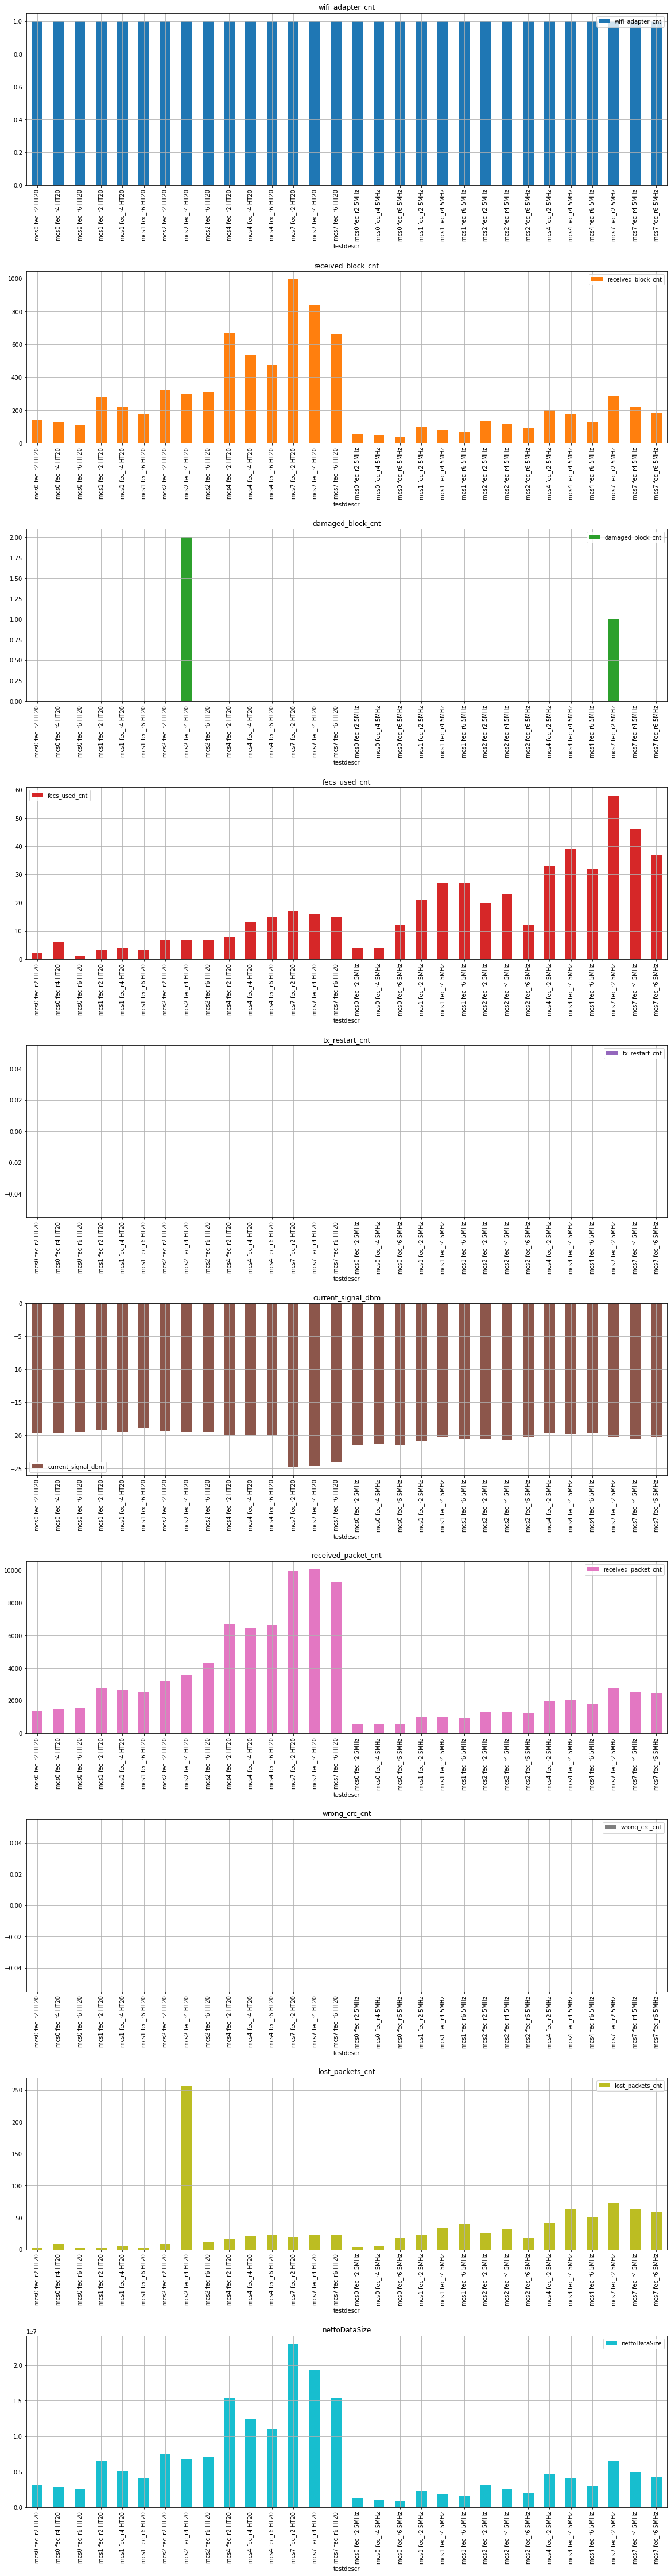

In [59]:
df_testsJoined = df_tests.copy()
df_testsJoined = df_testsJoined.drop('testid', 1)
df_testsJoined = df_testsJoined.drop('FEC_d', 1)
df_testsJoined = df_testsJoined.drop('Txpower', 1)
df_testsJoined = df_testsJoined.drop('stbc', 1)
df_testsJoined = df_testsJoined.drop('ldpc', 1)
df_testsJoined = df_testsJoined.drop('FEC_r', 1)
df_testsJoined = df_testsJoined.drop('mcs', 1)
df_testsJoined = df_testsJoined.drop('adapterIdx', 1)

df_testsJoined.set_index(["testdescr"],inplace=True)


ax = df_testsJoined.plot.bar(rot=90, subplots=True, sharex=False, grid=True, figsize=(20,80))

plt.subplots_adjust(hspace=0.5) 